In [9]:
import tkinter as tk
from tkinter import messagebox
import tkinter.font as font
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools

def get_dataset():

    # https://github.com/mwaskom/seaborn-data
    datasets_list = sns.get_dataset_names()

    # Access the list returned by Seaborn with datasets names, filtering out the string
    # matching the 'iris' substring and adding it to a new list.
    # Then access the list with the returned name by indexing the result.
    iris_dataset = list(filter(lambda x: "iris" in x, datasets_list))[0]

    # Print dataset name (uncomment for sanity check) 
    #print(f"Dataset name is: {iris_dataset}")

    # Load the dataset which is a DataFrame object by default, as the Seaborn library is 
    # closely integrated with pandas data structures.
    # https://seaborn.pydata.org/generated/seaborn.load_dataset.html)]
    df = sns.load_dataset(iris_dataset)

    # Return the DataFrame object
    return df

df = get_dataset()

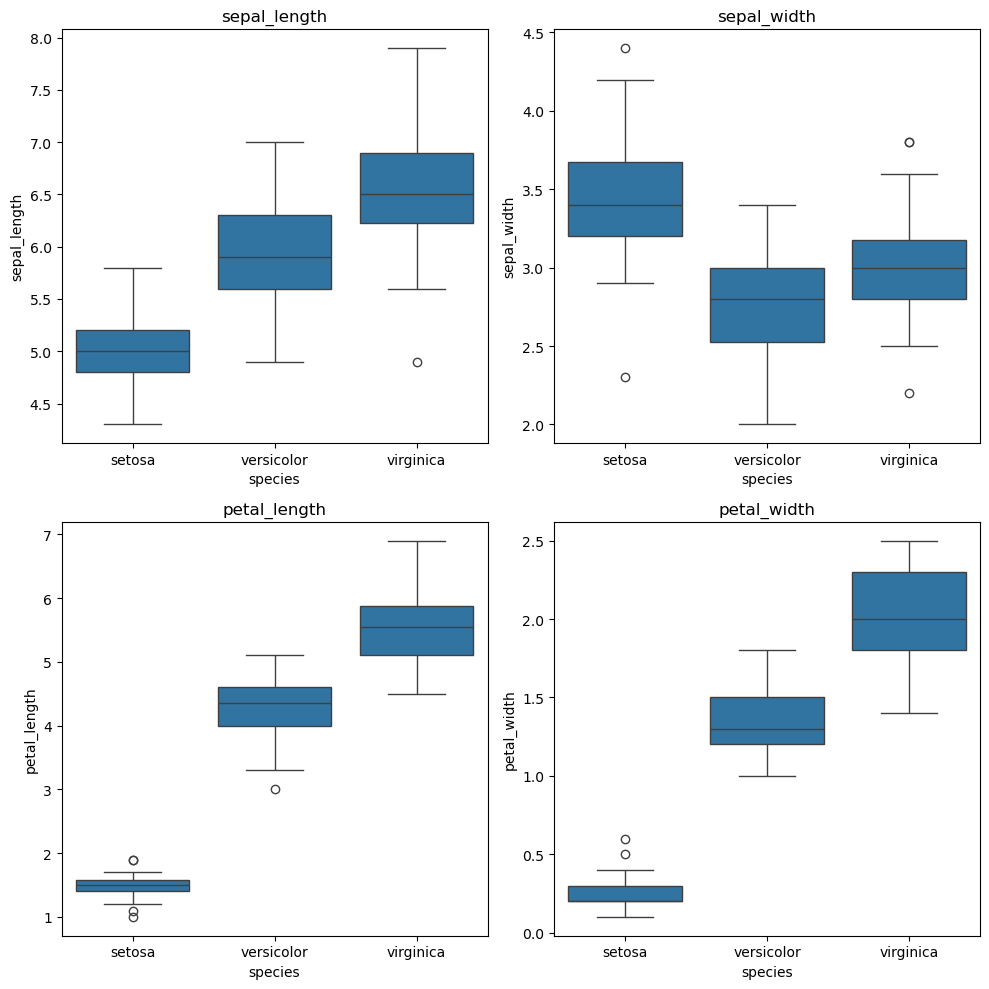

In [8]:
def check_outliers(df):
    
    variables = df.select_dtypes(include='number').columns

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Flatten the axes array
    axes = axes.flatten()

    # Loop through each variable and create a boxplot
    for i, var in enumerate(variables):
        sns.boxplot(x="species", y=var, data=df, ax=axes[i])
        axes[i].set_title(var)  

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()

check_outliers(df)

In [130]:
def check_outliers(df):

    print(f"Starting {__name__}")
    
    # Get the list of columns names in the DataFrame
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
    variables = df.select_dtypes(include='number').columns
    outlier_summary = []  # Initialize an empty list to store outlier information

    # Iterate over unique species values
    for species in df['species'].unique():
        # Filter dataframe for the current species
        df_species = df[df['species'] == species]
        print(f'\n\tLooping through {species}...')
        outlier_summary.append(f'\n>>> Outlier summary for {species} <<<\n')

        lower_array_agg = []
        upper_array_agg = []

        for var in variables: 
            # Calculate the upper and lower limits
            Q1 = df_species[var].quantile(0.25) # The 1st quartile is the value below which 25% of the data can be found
            Q3 = df_species[var].quantile(0.75) # The 3rd quartile is the value below which 75% of the data falls

            # Calculate the IQR, which measures the middle 50% of the data
            IQR = Q3 - Q1

            # Calculate the outlier thresholds as per the above formulas
            # Any data point below/above these values are considered outliers
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            # Create arrays of Boolean values indicating the outlier rows using Numpy’s `where` function
            # to find indices of all data points where the variable does meets the threshold condition
            # https://numpy.org/doc/stable/reference/generated/numpy.where.html
            upper_array = np.where(df_species[var] >= upper)[0]
            lower_array = np.where(df_species[var] <= lower)[0]

            lower_array_agg.append(lower_array)
            upper_array_agg.append(upper_array)

        # Check if any of the arrays contain outliers and append accordingly to the list.
        # Combine the variables and the arrays into a single iterable with zip() and loop through them 
        for var, lower_array, upper_array in zip(variables, lower_array_agg, upper_array_agg):
            # If any of the arrays isn't empty, append the outlier information to the list
            if len(lower_array) > 0 or len(upper_array) > 0:
                outlier_summary.append(f'\n\t\tOutliers found for {var}: \n\t\t\tLower bound: {lower_array} \n\t\t\tUpper bound: {upper_array}\n')
                print(f"\t\tOutlier summary for {var} appended to the array.")
            # If the arrays are empty, do nothing to prevent cluttering the list
            else:
                outlier_summary.append(f'\n\t\tNo outliers found for {var}\n')
                print(f"\t\tOutlier summary for {var} appended to the array.")
    
    # Write the collected outlier information to a text file
    with open("outlier_summary.txt", "w") as file:
        for item in outlier_summary:
            file.write(item)
        print(f"\t\tOutlier summary for all variables for appended to the txt file.")

    # https://stackoverflow.com/questions/16676101/print-the-approval-sign-check-mark-u2713-in-python
    print("\n\t\u2713 Outliers function succesfully finished.")


In [131]:
check_outliers(df)

Starting __main__

	Looping through setosa...
		Outlier summary for sepal_length appended to the array.
		Outlier summary for sepal_width appended to the array.
		Outlier summary for petal_length appended to the array.
		Outlier summary for petal_width appended to the array.

	Looping through versicolor...
		Outlier summary for sepal_length appended to the array.
		Outlier summary for sepal_width appended to the array.
		Outlier summary for petal_length appended to the array.
		Outlier summary for petal_width appended to the array.

	Looping through virginica...
		Outlier summary for sepal_length appended to the array.
		Outlier summary for sepal_width appended to the array.
		Outlier summary for petal_length appended to the array.
		Outlier summary for petal_width appended to the array.
		Outlier summary for all variables for appended to the txt file.

	✓ Outliers function succesfully finished.
